# 套件

In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import yfinance as yf
from datetime import datetime, timedelta

# 載入資料

In [2]:

# 載入事前已處理好的 Label

y_symbol = 'D:/12_ChatGPT打造AI投資助理/程式碼/test_XH_01.xlsx'
df = pd.read_excel(y_symbol)

display(df)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal
0,2012-01-03,7005.390137,7073.790039,7005.390137,7053.379883,7053.354004,1818200,NaN,NaN,0,0
1,2012-01-04,7093.069824,7116.220215,7064.580078,7082.970215,7082.943848,2132200,NaN,NaN,0,0
2,2012-01-05,7099.350098,7130.859863,7073.319824,7130.859863,7130.833008,2209000,NaN,NaN,0,0
3,2012-01-06,7129.529785,7139.040039,7090.470215,7120.509766,7120.482910,2354400,NaN,NaN,0,0
4,2012-01-09,7103.089844,7103.089844,7050.250000,7093.040039,7093.013672,1741000,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0


# check 'triple_barrier_signal'

In [3]:
df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal
1692,2018-12-03,9979.209961,10148.750000,9979.209961,10137.870117,10137.870117,3055000,10137.870117,9667.299805,0,0
1693,2018-12-04,10120.429688,10126.019531,10061.700195,10083.540039,10083.540039,2576200,10137.870117,9667.299805,-1,0
1694,2018-12-05,9971.980469,9971.980469,9895.290039,9916.740234,9916.740234,2025400,10137.870117,9667.299805,-1,0
1695,2018-12-06,9850.080078,9850.080078,9664.750000,9684.719727,9684.719727,2658000,10137.870117,9667.299805,-1,0
1696,2018-12-07,9719.459961,9785.200195,9719.459961,9760.879883,9760.879883,1716300,10137.870117,9667.299805,0,0
1697,2018-12-10,9722.969727,9722.969727,9626.469727,9647.540039,9647.540039,1868800,10137.870117,9647.540039,-1,0
1698,2018-12-11,9661.719727,9720.959961,9661.719727,9707.040039,9707.040039,1768400,10137.870117,9647.540039,0,0
1699,2018-12-12,9741.450195,9835.559570,9741.450195,9816.450195,9816.450195,1860200,10137.870117,9647.540039,0,0
1700,2018-12-13,9827.320312,9871.959961,9815.500000,9858.759766,9858.759766,2034600,10137.870117,9647.540039,0,0
1701,2018-12-14,9818.950195,9818.950195,9718.940430,9774.160156,9774.160156,1837600,10137.870117,9647.540039,-1,0


In [4]:
import seaborn as sns
print(df['triple_barrier_signal'].value_counts())
#sns.countplot(df['triple_barrier_signal'])

0    1607
1     105
Name: triple_barrier_signal, dtype: int64


# plot buy price and sell price

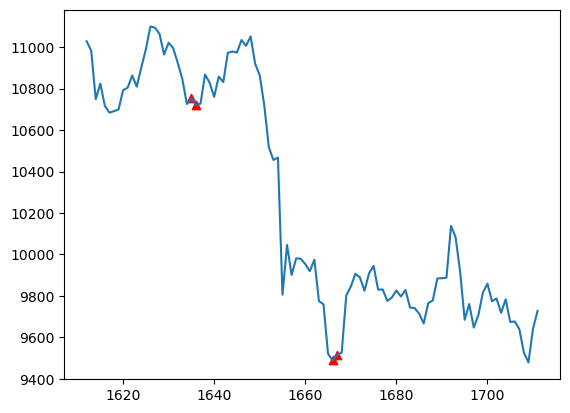

In [5]:
import matplotlib.pyplot as plt

df_recent = df.tail(100)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()
plt.scatter(buy.index,buy.values,color='red',marker='^')
plt.scatter(sell.index,sell.values,color='green',marker='v')
plt.show()

# 建立ohlcv

In [6]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count    1711.000000
mean       52.971294
std        12.312426
min         9.948198
25%        44.633990
50%        53.932143
75%        61.521268
max       100.000000
Name: RSI, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760


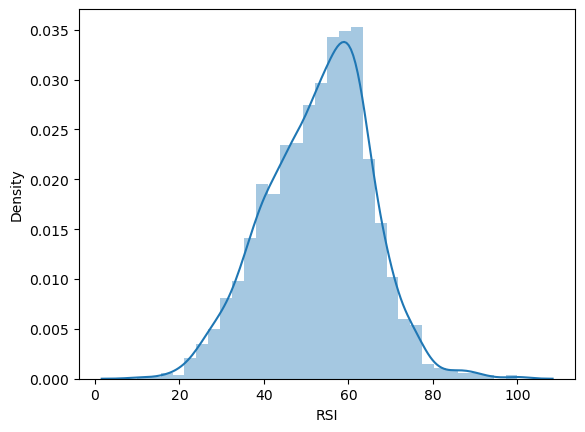

In [7]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    1699.000000
mean      -42.926721
std        31.977802
min      -100.000000
25%       -72.740835
50%       -38.033745
75%       -12.982162
max        -0.000000
Name: Williams %R, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI,Williams %R
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831,-85.936000
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322,-87.775458
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696,-98.572611
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763,-57.793684
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760,-36.258904


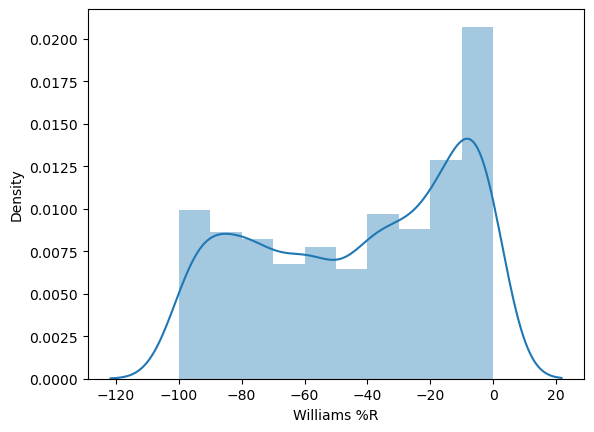

In [8]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     1672.000000
mean      9025.944442
std       1082.886528
min       7162.940954
25%       8156.805432
50%       8965.591463
75%       9791.132306
max      10922.561952
Name: SMA, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI,Williams %R,SMA
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831,-85.936000,9794.703411
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322,-87.775458,9794.966082
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696,-98.572611,9793.816811
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763,-57.793684,9789.900462
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760,-36.258904,9787.038753


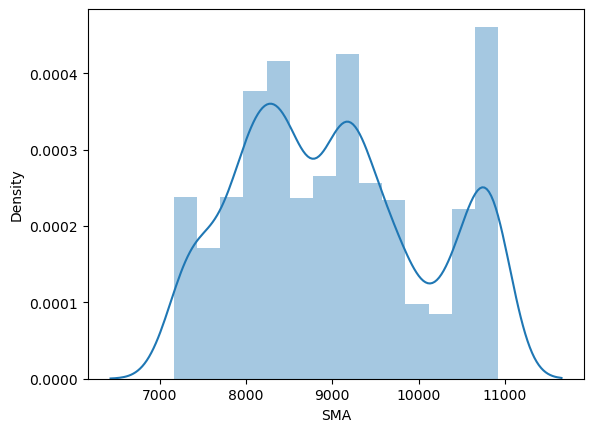

In [9]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     1712.000000
mean      9010.207914
std       1100.190173
min       7053.379883
25%       8148.529154
50%       8959.028619
75%       9776.657078
max      11134.288080
Name: EMA, dtype: float64


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI,Williams %R,SMA,EMA
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831,-85.936000,9794.703411,9723.374540
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322,-87.775458,9794.966082,9684.117601
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696,-98.572611,9793.816811,9643.092128
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763,-57.793684,9789.900462,9642.785616
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760,-36.258904,9787.038753,9659.710524


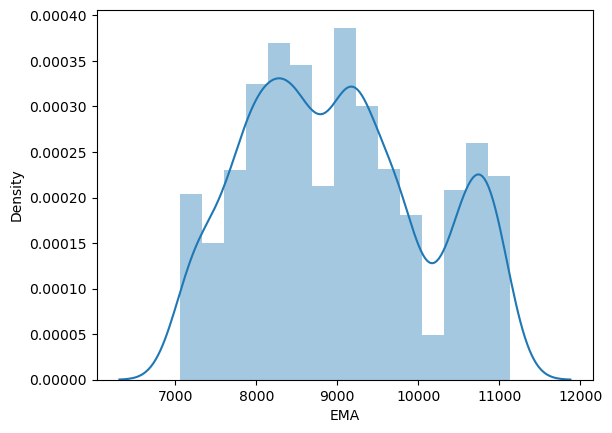

In [10]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     1704.000000
mean      9021.141123
std       1096.316742
min       7037.976638
25%       8167.815717
50%       8979.828885
75%       9769.317334
max      11178.657248
Name: WMA, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831,-85.936000,9794.703411,9723.374540,9715.382899
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322,-87.775458,9794.966082,9684.117601,9671.249306
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696,-98.572611,9793.816811,9643.092128,9623.926020
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763,-57.793684,9789.900462,9642.785616,9617.555924
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760,-36.258904,9787.038753,9659.710524,9631.302626


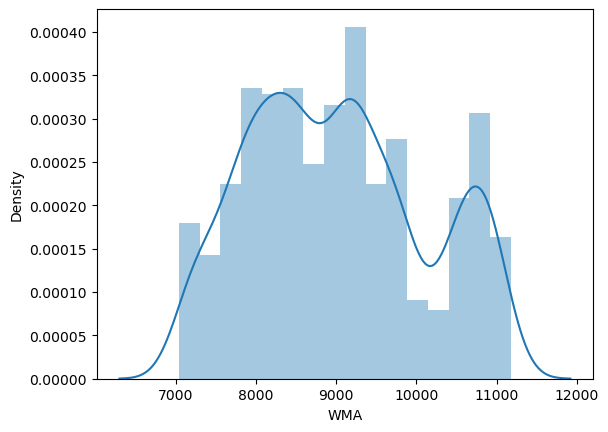

In [11]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     1694.000000
mean      9034.188459
std       1095.608223
min       7000.170581
25%       8170.328705
50%       8970.948192
75%       9764.215682
max      11251.757134
Name: HMA, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831,-85.936000,9794.703411,9723.374540,9715.382899,9703.195706
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322,-87.775458,9794.966082,9684.117601,9671.249306,9661.171790
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696,-98.572611,9793.816811,9643.092128,9623.926020,9607.172546
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763,-57.793684,9789.900462,9642.785616,9617.555924,9571.715971
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760,-36.258904,9787.038753,9659.710524,9631.302626,9566.202759


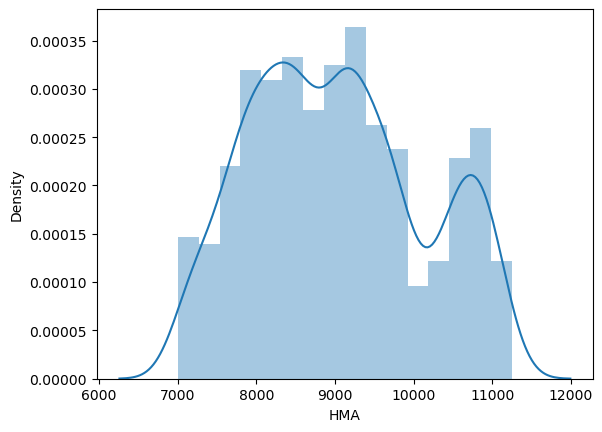

In [12]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     1712.000000
mean      9016.142062
std       1103.394927
min       6962.244351
25%       8142.627645
50%       8969.649533
75%       9775.375814
max      11249.877643
Name: TEMA, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831,-85.936000,9794.703411,9723.374540,9715.382899,9703.195706,9653.420898
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322,-87.775458,9794.966082,9684.117601,9671.249306,9661.171790,9579.518917
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696,-98.572611,9793.816811,9643.092128,9623.926020,9607.172546,9511.676764
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763,-57.793684,9789.900462,9642.785616,9617.555924,9571.715971,9551.535422
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760,-36.258904,9787.038753,9659.710524,9631.302626,9566.202759,9622.580249


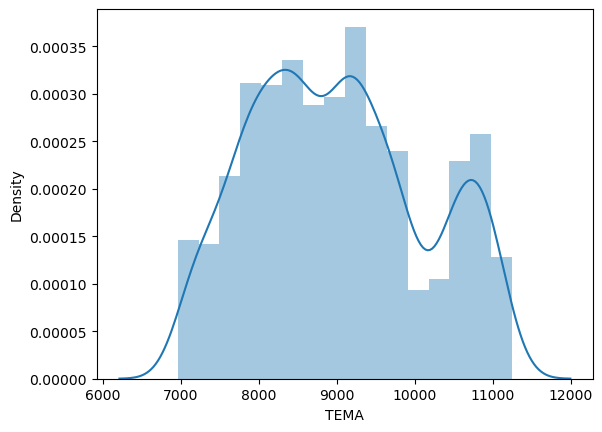

In [13]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    1711.000000
mean       15.473862
std       111.591899
min      -367.416775
25%       -70.571556
50%        32.191663
75%       101.474810
max       347.439300
Name: CCI, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831,-85.936000,9794.703411,9723.374540,9715.382899,9703.195706,9653.420898,-108.233928
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322,-87.775458,9794.966082,9684.117601,9671.249306,9661.171790,9579.518917,-162.521195
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696,-98.572611,9793.816811,9643.092128,9623.926020,9607.172546,9511.676764,-147.695044
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763,-57.793684,9789.900462,9642.785616,9617.555924,9571.715971,9551.535422,-79.957325
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760,-36.258904,9787.038753,9659.710524,9631.302626,9566.202759,9622.580249,-32.988442


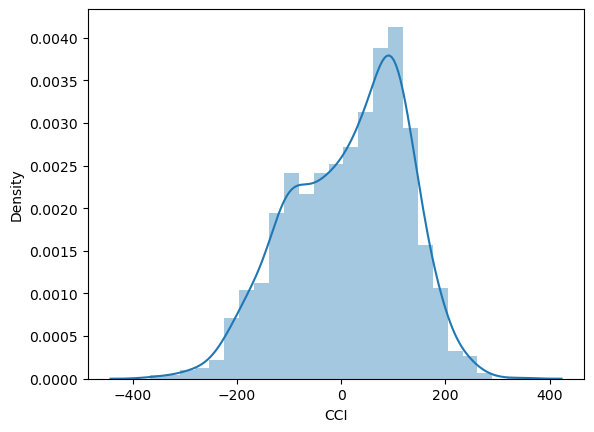

In [14]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    1711.000000
mean        6.158382
std        29.165232
min       -86.464212
25%       -13.516547
50%         8.392908
75%        26.869824
max       100.000000
Name: CMO, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,0,41.569831,-85.936000,9794.703411,9723.374540,9715.382899,9703.195706,9653.420898,-108.233928,-20.428615
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,0,37.047322,-87.775458,9794.966082,9684.117601,9671.249306,9661.171790,9579.518917,-162.521195,-32.724010
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,0,35.281696,-98.572611,9793.816811,9643.092128,9623.926020,9607.172546,9511.676764,-147.695044,-37.320554
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,0,44.848763,-57.793684,9789.900462,9642.785616,9617.555924,9571.715971,9551.535422,-79.957325,-9.281028
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,0,49.125760,-36.258904,9787.038753,9659.710524,9631.302626,9566.202759,9622.580249,-32.988442,2.411199


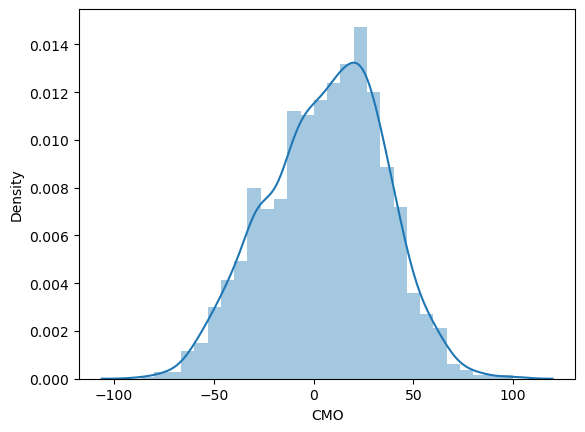

In [15]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    1712.000000
mean       -0.146981
std        25.033275
min      -111.780784
25%       -16.635329
50%        -0.161841
75%        15.994976
max        77.011167
Name: MACD, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,...,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,...,41.569831,-85.936000,9794.703411,9723.374540,9715.382899,9703.195706,9653.420898,-108.233928,-20.428615,-10.697626
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,...,37.047322,-87.775458,9794.966082,9684.117601,9671.249306,9661.171790,9579.518917,-162.521195,-32.724010,-19.034937
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,...,35.281696,-98.572611,9793.816811,9643.092128,9623.926020,9607.172546,9511.676764,-147.695044,-37.320554,-25.914414
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,...,44.848763,-57.793684,9789.900462,9642.785616,9617.555924,9571.715971,9551.535422,-79.957325,-9.281028,-18.016052
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,...,49.125760,-36.258904,9787.038753,9659.710524,9631.302626,9566.202759,9622.580249,-32.988442,2.411199,-6.124221


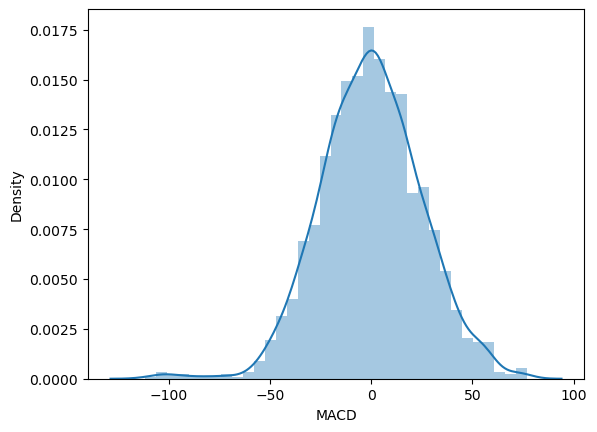

In [16]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    1712.000000
mean       -0.001542
std         0.282102
min        -1.057012
25%        -0.192425
50%        -0.004348
75%         0.175706
max         0.936046
Name: PPO, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,...,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,...,-85.936000,9794.703411,9723.374540,9715.382899,9703.195706,9653.420898,-108.233928,-20.428615,-10.697626,-0.110500
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,...,-87.775458,9794.966082,9684.117601,9671.249306,9661.171790,9579.518917,-162.521195,-32.724010,-19.034937,-0.196464
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,...,-98.572611,9793.816811,9643.092128,9623.926020,9607.172546,9511.676764,-147.695044,-37.320554,-25.914414,-0.267958
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,...,-57.793684,9789.900462,9642.785616,9617.555924,9571.715971,9551.535422,-79.957325,-9.281028,-18.016052,-0.187021
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,...,-36.258904,9787.038753,9659.710524,9631.302626,9566.202759,9622.580249,-32.988442,2.411199,-6.124221,-0.064592


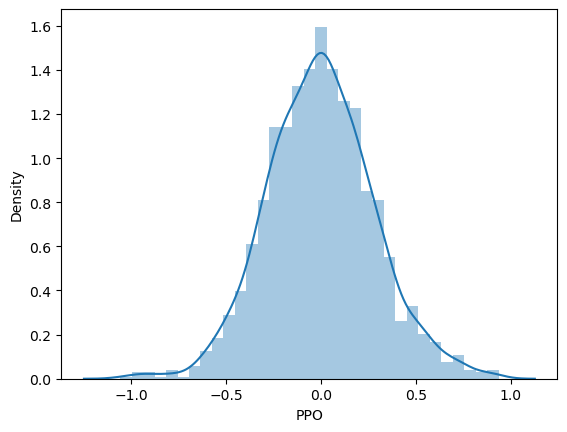

In [17]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    1700.000000
mean        0.256787
std         2.884933
min       -12.299099
25%        -1.460515
50%         0.431793
75%         2.247694
max        11.829148
Name: ROC, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,...,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,...,9794.703411,9723.374540,9715.382899,9703.195706,9653.420898,-108.233928,-20.428615,-10.697626,-0.110500,-0.464851
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,...,9794.966082,9684.117601,9671.249306,9661.171790,9579.518917,-162.521195,-32.724010,-19.034937,-0.196464,-2.395174
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,...,9793.816811,9643.092128,9623.926020,9607.172546,9511.676764,-147.695044,-37.320554,-25.914414,-0.267958,-1.747075
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,...,9789.900462,9642.785616,9617.555924,9571.715971,9551.535422,-79.957325,-9.281028,-18.016052,-0.187021,-0.674567
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,...,9787.038753,9659.710524,9631.302626,9566.202759,9622.580249,-32.988442,2.411199,-6.124221,-0.064592,-0.907049


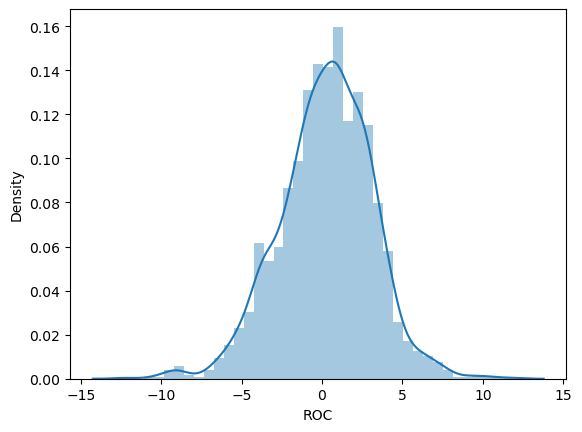

In [18]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    1.703000e+03
mean     6.444094e+09
std      2.192730e+09
min     -1.129452e+07
25%      4.982419e+09
50%      6.492993e+09
75%      8.288682e+09
max      1.088946e+10
Name: CFI, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,...,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,...,9723.374540,9715.382899,9703.195706,9653.420898,-108.233928,-20.428615,-10.697626,-0.110500,-0.464851,5.094903e+09
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,...,9684.117601,9671.249306,9661.171790,9579.518917,-162.521195,-32.724010,-19.034937,-0.196464,-2.395174,5.037866e+09
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,...,9643.092128,9623.926020,9607.172546,9511.676764,-147.695044,-37.320554,-25.914414,-0.267958,-1.747075,4.979834e+09
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,...,9642.785616,9617.555924,9571.715971,9551.535422,-79.957325,-9.281028,-18.016052,-0.187021,-0.674567,4.977018e+09
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,...,9659.710524,9631.302626,9566.202759,9622.580249,-32.988442,2.411199,-6.124221,-0.064592,-0.907049,4.996743e+09


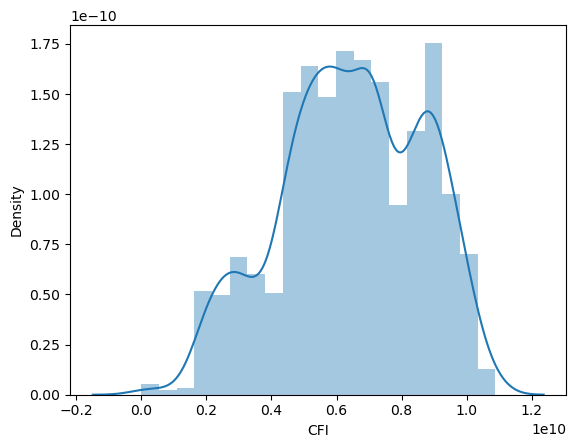

In [19]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    1699.000000
mean       -0.419249
std        16.374854
min       -62.933432
25%       -10.978943
50%         0.788957
75%        10.371631
max        86.375490
Name: DMI, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,...,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,...,9715.382899,9703.195706,9653.420898,-108.233928,-20.428615,-10.697626,-0.110500,-0.464851,5.094903e+09,-11.349519
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,...,9671.249306,9661.171790,9579.518917,-162.521195,-32.724010,-19.034937,-0.196464,-2.395174,5.037866e+09,-19.055029
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,...,9623.926020,9607.172546,9511.676764,-147.695044,-37.320554,-25.914414,-0.267958,-1.747075,4.979834e+09,-15.461494
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,...,9617.555924,9571.715971,9551.535422,-79.957325,-9.281028,-18.016052,-0.187021,-0.674567,4.977018e+09,-9.204287
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,...,9631.302626,9566.202759,9622.580249,-32.988442,2.411199,-6.124221,-0.064592,-0.907049,4.996743e+09,-4.775416


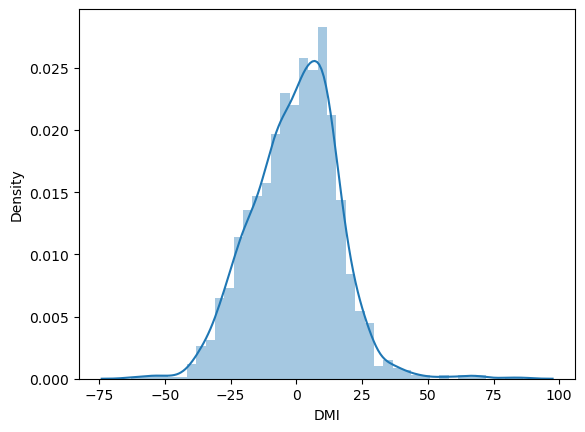

In [20]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count     1712.000000
mean      8990.504737
std       1119.448356
min       6857.350098
25%       8118.526233
50%       8903.387065
75%       9775.629883
max      11270.179688
Name: SAR, dtype: float64


C:\Users\sheng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Date,Open,High,Low,Close,Adj Close,Volume,Highest_high,Lowest_Low,Xh_md,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
1707,2018-12-24,9646.530273,9658.950195,9613.290039,9639.700195,9639.700195,1385100,10137.870117,9639.700195,-1,...,9703.195706,9653.420898,-108.233928,-20.428615,-10.697626,-0.110500,-0.464851,5.094903e+09,-11.349519,9888.294820
1708,2018-12-25,9559.700195,9559.700195,9479.059570,9527.089844,9527.089844,1458500,10137.870117,9527.089844,-1,...,9661.171790,9579.518917,-162.521195,-32.724010,-19.034937,-0.196464,-2.395174,5.037866e+09,-19.055029,9864.056859
1709,2018-12-26,9544.870117,9591.910156,9473.299805,9478.990234,9478.990234,1299700,10137.870117,9478.990234,-1,...,9607.172546,9511.676764,-147.695044,-37.320554,-25.914414,-0.267958,-1.747075,4.979834e+09,-15.461494,9825.557130
1710,2018-12-27,9555.009766,9670.969727,9555.009766,9641.559570,9641.559570,1511100,10137.870117,9478.990234,0,...,9571.715971,9551.535422,-79.957325,-9.281028,-18.016052,-0.187021,-0.674567,4.977018e+09,-9.204287,9783.286251
1711,2018-12-28,9649.969727,9727.410156,9630.769531,9727.410156,9727.410156,1411300,10137.870117,9478.990234,0,...,9566.202759,9622.580249,-32.988442,2.411199,-6.124221,-0.064592,-0.907049,4.996743e+09,-4.775416,9746.087878


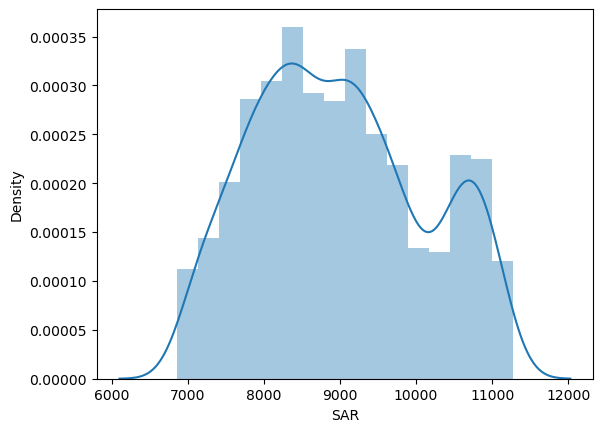

In [21]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# 定義features(X) label(y)

# MACD RSI講一下

In [22]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR']
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(1712, 26)
(1672, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
1707,41.569831,-85.936000,9794.703411,9723.374540,9715.382899,9703.195706,9653.420898,-108.233928,-20.428615,-10.697626,-0.110500,-0.464851,5.094903e+09,-11.349519,9888.294820,0
1708,37.047322,-87.775458,9794.966082,9684.117601,9671.249306,9661.171790,9579.518917,-162.521195,-32.724010,-19.034937,-0.196464,-2.395174,5.037866e+09,-19.055029,9864.056859,0
1709,35.281696,-98.572611,9793.816811,9643.092128,9623.926020,9607.172546,9511.676764,-147.695044,-37.320554,-25.914414,-0.267958,-1.747075,4.979834e+09,-15.461494,9825.557130,0
1710,44.848763,-57.793684,9789.900462,9642.785616,9617.555924,9571.715971,9551.535422,-79.957325,-9.281028,-18.016052,-0.187021,-0.674567,4.977018e+09,-9.204287,9783.286251,0
1711,49.125760,-36.258904,9787.038753,9659.710524,9631.302626,9566.202759,9622.580249,-32.988442,2.411199,-6.124221,-0.064592,-0.907049,4.996743e+09,-4.775416,9746.087878,0


# features scaling(特徵縮放)

In [23]:
from sklearn.preprocessing import MinMaxScaler
import pickle
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
1707,0.454417,0.140640,0.700007,0.653674,0.646610,0.635769,0.627660,0.362566,0.420523,0.535421,0.474905,0.490473,0.369074,0.483635,0.686848,0
1708,0.389427,0.122245,0.700077,0.644038,0.635952,0.625884,0.610424,0.286625,0.342224,0.491260,0.431773,0.410470,0.362863,0.411391,0.681356,0
1709,0.364054,0.014274,0.699772,0.633968,0.624523,0.613183,0.594601,0.307365,0.312953,0.454820,0.395901,0.437331,0.356545,0.445083,0.672631,0
1710,0.501537,0.422063,0.698730,0.633893,0.622984,0.604844,0.603898,0.402122,0.491512,0.496656,0.436511,0.481781,0.356238,0.503748,0.663052,0
1711,0.562999,0.637411,0.697969,0.638047,0.626304,0.603547,0.620467,0.467826,0.565970,0.559645,0.497938,0.472146,0.358386,0.545272,0.654623,0


In [24]:
df.tail(3)[['RSI','Williams %R','SMA']]

,RSI,Williams %R,SMA
1709,35.281696,-98.572611,9793.816811
1710,44.848763,-57.793684,9789.900462
1711,49.125760,-36.258904,9787.038753


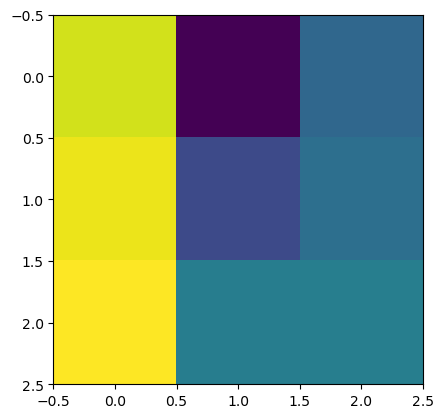

In [25]:
img = df.head(3)[['RSI','Williams %R','MACD']].values
plt.imshow(img)

In [26]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# 定義X,y pair

In [27]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:若i為0,則i+days為15因此數據index為0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:若i為0days為15則[i+days-1:i+days]為[14:15]相當於index[14]之y_name('triple_barrier_signal')
  X = np.array(X) # 轉成np_array
  Xs.append(X) #加入至list
  ys.append(y) #加入至list
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|████████████████████████████████████████████████████████████████████████████| 1658/1658 [00:00<00:00, 2195.21it/s]

準備完成


# check 資料總數跟 資料時間範圍

In [28]:
# print('資料筆數:',len(Xs))
# print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
# print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

# Reshape X (圖片數量,長,寬,1張)

In [29]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(1658, 15, 15)
(1658, 15, 15, 1)


# One hot encoding of label(獨熱編碼)

原始y代表漲幅

In [30]:
print('One hot encoding前')
print(ys.shape)
print(ys[:5])
from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print('One hot encoding後')
print(ys.shape)
print(ys[:5])

One hot encoding前
(1658, 1)
[[0]
 [0]
 [0]
 [0]
 [0]]
One hot encoding後
(1658, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Visualization

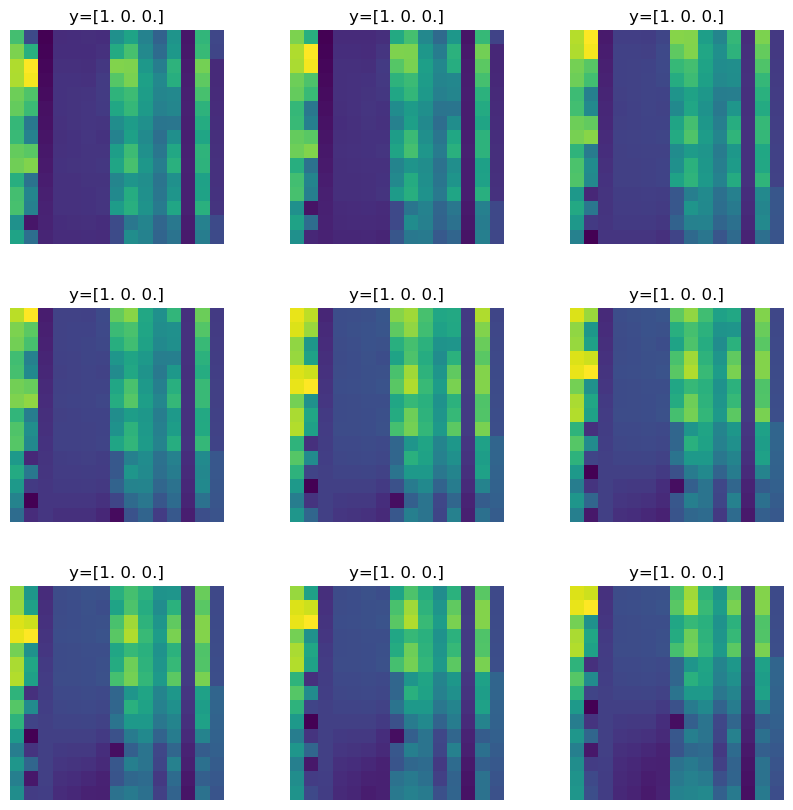

In [31]:
import matplotlib.pyplot as plt

# n为batch大小，这里设为9
n = 9

# 生成一个九宫格的画布
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# 遍历batch中的每一个样本，依次画出对应的矩阵和标注
for i in range(n):
    # 获取当前样本的矩阵和标注
    x = Xs[i]
    y = ys[i]
    
    # 在对应的子图上画出矩阵和标注
    axs[i//3, i%3].imshow(x)
    axs[i//3, i%3].set_title('y={}'.format(y))
    axs[i//3, i%3].axis('off')

# 调整子图之间的距离
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 显示画布
plt.show()


# Split training and test sets

In [32]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(1618, 15, 15, 1) (1618, 3) (40, 15, 15, 1)


# 調整採樣

In [33]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(1618, 225)
(1618,)
0    105
1    105
Name: 0, dtype: int64
(210, 15, 15, 1)
(210, 3)


# Split training and val sets

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(168, 15, 15, 1) (168, 3) (42, 15, 15, 1) (42, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [35]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

0    1553
1     105
dtype: int64

In [36]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    105
1    105
dtype: int64

In [37]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

0    84
1    84
dtype: int64

In [38]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

0    21
1    21
dtype: int64

# 製作模型

In [39]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout


# 創建一個序列模型
model = Sequential()

# 添加第一個卷積層，使用32個3x3的卷積核，使用ReLU激活函數，並指定輸入形狀
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)))

# 添加第二個卷積層，使用64個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(64, (3, 3), activation='relu'))

# 添加第三個卷積層，使用128個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(128, (3, 3), activation='relu'))

# 添加平坦層，將卷積層的輸出展開為一維數組
model.add(Flatten())

# 添加dropout層，防止過度擬合
model.add(Dropout(0.5))

# 添加全連接層，使用softmax激活函數，輸出3個類別
model.add(Dense(3, activation='softmax'))

# 編譯模型，使用交叉熵損失函數和Adam優化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 打印模型結構
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dropout (Dropout)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 3)                 31107     
                                                                 
Total params: 123,779
Trainable params: 123,779
Non-trai

In [40]:
'''
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()
'''

"\nnclasses = 3 \nmodel = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32\nmodel.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64\nmodel.add(MaxPool2D(pool_size=(5,5)))# 3,3,64\nmodel.add(Flatten())#576\nmodel.add(Dropout(0.5))#288\nmodel.add(Dense(128, activation='relu'))#128\nmodel.add(Dropout(0.5))#64\nmodel.add(Dense(32, activation='relu'))#32\nmodel.add(Dropout(0.5))#16\nmodel.add(Dense(nclasses, activation='softmax'))#3\nmodel.summary()\n"

# 編譯模型

In [41]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 定義訓練過程的早停法機制

In [42]:
es = EarlyStopping(monitor='val_accuracy',#驗證集acc
                   min_delta=0.0001, 
                   patience=20,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [43]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 200,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/200
2/2 [==============================] - 1s 548ms/step - loss: 1.0305 - accuracy: 0.4286 - val_loss: 0.7486 - val_accuracy: 0.6190
Epoch 2/200
2/2 [==============================] - 0s 104ms/step - loss: 0.7352 - accuracy: 0.5417 - val_loss: 0.6899 - val_accuracy: 0.5238
Epoch 3/200
2/2 [==============================] - 0s 82ms/step - loss: 0.7056 - accuracy: 0.5536 - val_loss: 0.6621 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 105ms/step - loss: 0.6952 - accuracy: 0.5179 - val_loss: 0.6244 - val_accuracy: 0.6190
Epoch 5/200
2/2 [==============================] - 0s 131ms/step - loss: 0.6912 - accuracy: 0.5774 - val_loss: 0.6120 - val_accuracy: 0.6429
Epoch 6/200
2/2 [==============================] - 0s 147ms/step - loss: 0.6550 - accuracy: 0.5952 - val_loss: 0.6006 - val_accuracy: 0.6190
Epoch 7/200
2/2 [==============================] - 0s 142ms/step - loss: 0.7160 - accuracy: 0.5357 - val_loss: 0.5941 - val_accuracy: 0.5714
Epoch 8/200
2/

Epoch 59/200
2/2 [==============================] - 0s 136ms/step - loss: 0.4184 - accuracy: 0.7857 - val_loss: 0.4199 - val_accuracy: 0.8095
Epoch 60/200
2/2 [==============================] - 0s 145ms/step - loss: 0.3935 - accuracy: 0.7917 - val_loss: 0.4107 - val_accuracy: 0.8333
Epoch 61/200
2/2 [==============================] - 0s 145ms/step - loss: 0.3587 - accuracy: 0.8274 - val_loss: 0.4561 - val_accuracy: 0.8571
Epoch 62/200
2/2 [==============================] - 0s 134ms/step - loss: 0.3756 - accuracy: 0.8631 - val_loss: 0.4879 - val_accuracy: 0.8333
Epoch 63/200
2/2 [==============================] - 0s 133ms/step - loss: 0.3888 - accuracy: 0.8214 - val_loss: 0.4579 - val_accuracy: 0.8333
Epoch 64/200
2/2 [==============================] - 0s 132ms/step - loss: 0.3638 - accuracy: 0.8333 - val_loss: 0.4407 - val_accuracy: 0.8095
Epoch 65/200
2/2 [==============================] - 0s 133ms/step - loss: 0.3767 - accuracy: 0.8393 - val_loss: 0.4073 - val_accuracy: 0.7857
Epoch 

# 訓練過程評估

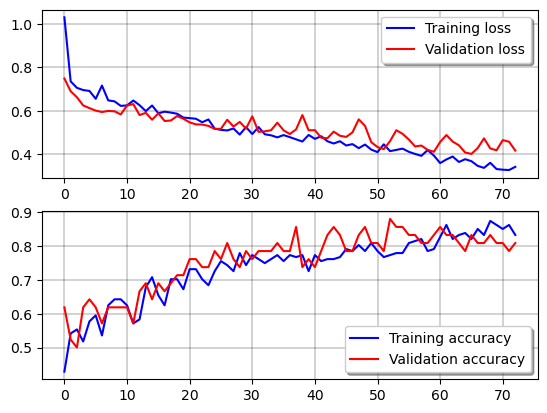

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

2/2 [==============================] - 0s 11ms/step


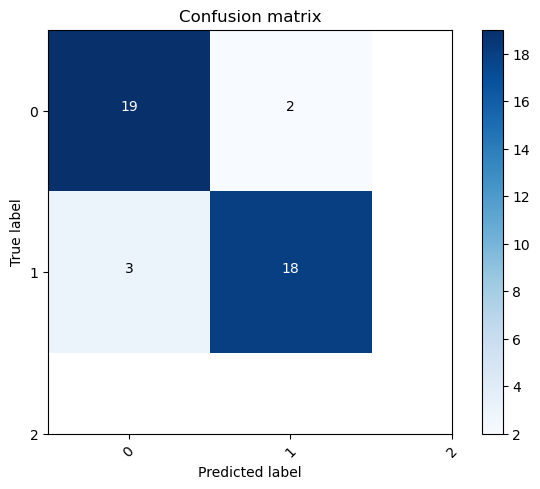

In [45]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
nclasses = 3
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# classification_report 

In [46]:
from sklearn.metrics import classification_report 
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

2/2 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

        Hold       0.86      0.90      0.88        21
         BUY       0.90      0.86      0.88        21
        SELL       0.00      0.00      0.00         0

   micro avg       0.88      0.88      0.88        42
   macro avg       0.59      0.59      0.59        42
weighted avg       0.88      0.88      0.88        42
 samples avg       0.88      0.88      0.88        42



C:\Users\sheng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sheng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 驗證集的準確度

In [47]:
def val_acc(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
val_acc(yval,y_pred)

0.8809523809523809

## 測試集預測

2/2 [==============================] - 0s 0s/step
40


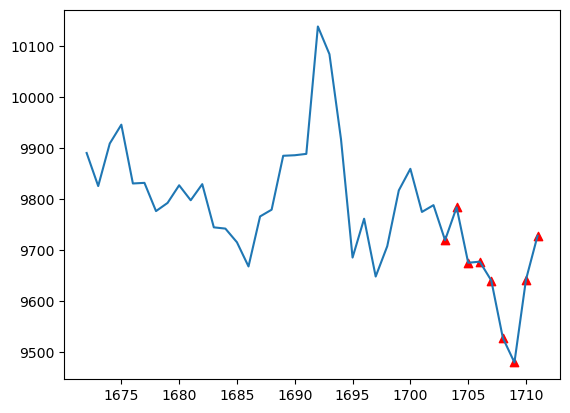

In [49]:
import pandas as pd
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))
C = pd.DataFrame()
# C['Close'] = yf.download(y_symbol, start = startdate,end = enddate)['Close']
C['Close'] = pd.read_excel(y_symbol)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer 
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 製作交易訊號表格

In [50]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(20)

2/2 [==============================] - 0s 11ms/step


,Close,HOLD%,BUY%,SELL%
1692,10137.8701,0.9564,0.0436,0.0000
1693,10083.5400,0.9756,0.0244,0.0000
1694,9916.7402,0.9771,0.0229,0.0000
1695,9684.7197,0.9460,0.0540,0.0000
1696,9760.8799,0.8344,0.1656,0.0000
1697,9647.5400,0.6454,0.3546,0.0000
1698,9707.0400,0.5302,0.4698,0.0000
1699,9816.4502,0.5316,0.4684,0.0000
1700,9858.7598,0.5616,0.4384,0.0000
1701,9774.1602,0.5559,0.4441,0.0000


# 保存模型

In [51]:
model.save('model.h5')
del model
from keras.models import load_model
model = load_model('model.h5')
predict = model.predict(X_test)
predict[-5:]

2/2 [==============================] - 0s 5ms/step


array([[0.4308976 , 0.5691025 , 0.        ],
       [0.35971883, 0.6402811 , 0.00000001],
       [0.30744323, 0.69255674, 0.00000001],
       [0.32251748, 0.6774825 , 0.00000001],
       [0.4609852 , 0.5390148 , 0.00000001]], dtype=float32)